# Required assignment 22.3: Text clustering for a real-life data set

In this notebook you will apply both k-means and hierarchical clustering. For the k-means task, you will be clustering Amazon food reviews.


- [Part 1](#part1): k-means clustering for Amazon food reviews
- [Part 2](#part2): hierarchical clustering


In [2]:
import os
import pathlib as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import get_data_home
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(1)

[Back to top](#Index:)

<a id='part1'></a>

### Part 1: k-means clustering for Amazon food reviews

In this part of the assignment, you will be clustering reviews of food from Amazon. The data span a period of more than ten years, up to October 2012. This task will consist of loading the data, vectorising the text input and then fitting a k-means model to the data to gain insights.

### Question 1:
Load the `datasample.csv` data set and assign it to `dataset`.


HINT: use `engine='python'` . Using engine='python' ensures that the CSV file is read correctly even if it contains formatting issues, especially common in large, real-world text data sets such as product reviews.

In [3]:
### GRADED CELL
dataset = None

# YOUR CODE HERE
#raise NotImplementedError()

dataset = pd.read_csv("data/datasample.csv", engine="python")

print(dataset.head())

       Id   ProductId          UserId                           ProfileName  \
0  236182  B000U9WZ90  A3DN4WC93DUEY0          K. Kannan "shopping machine"   
1  400671  B0052XN0EI  A3DNG54DMW2G88                            M. Klinker   
2  432371  B003A199AI  A1CVEGNOQ62A25                                Edward   
3  446671  B003QTZ2RS   A516WMM145WY3                                  Dawn   
4  354737  B002UQIZ2C  A2EPRB513HYKV8  Andrew H. Mcdonald "Andrew McDonald"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1241913600   
1                     0                       0      5  1335830400   
2                     1                       4      1  1314921600   
3                     0                       0      4  1303603200   
4                    10                      10      5  1200355200   

                               Summary  \
0                        Great extract   
1                   


Next, use `.head()` to visualise the dataframe.

In [4]:
print(dataset.head())


       Id   ProductId          UserId                           ProfileName  \
0  236182  B000U9WZ90  A3DN4WC93DUEY0          K. Kannan "shopping machine"   
1  400671  B0052XN0EI  A3DNG54DMW2G88                            M. Klinker   
2  432371  B003A199AI  A1CVEGNOQ62A25                                Edward   
3  446671  B003QTZ2RS   A516WMM145WY3                                  Dawn   
4  354737  B002UQIZ2C  A2EPRB513HYKV8  Andrew H. Mcdonald "Andrew McDonald"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1241913600   
1                     0                       0      5  1335830400   
2                     1                       4      1  1314921600   
3                     0                       0      4  1303603200   
4                    10                      10      5  1200355200   

                               Summary  \
0                        Great extract   
1                   

### Question 2:
 Next, you want to create a variable `texts` and set its value as the `Text` column (only) of the data set.

In [5]:
### GRADED CELL
texts = ...

# YOUR CODE HERE
#raise NotImplementedError()

texts = dataset["Text"]

print(texts.head())

0    This is the second time I purchase this produc...
1    Arrived in very good time.  Very Good Popcorn....
2    After eating popchips for some time, I thought...
3    I love Sweet Tea.  The Sweeter, the better for...
4    A review for cookies?  Why not?<br /><br />My ...
Name: Text, dtype: object


You will use the `TfidfVectorizer` class from the scikit-learn library to turn the strings into a vectorised format.

This method allows us to convert the text into a vectorized format that the computer can understand. This particular method also weighs for word frequency so that you don't put too much emphasis on common words such as 'the', 'a' and 'and'.

You can read more about this method in the scikit-learn [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


### Question 3:
- Use `TfidfVectorizer(stop_words='english')`, and assign it to `vectorizer`.

- Use `vectorizer.fit_transform(texts)`, and assign it to `vectorized_text`.



In [6]:
###GRADED CELL
vectorizer = None
vectorized_text = None

# YOUR CODE HERE
#raise NotImplementedError()

vectorizer = TfidfVectorizer(stop_words='english')
vectorized_text = vectorizer.fit_transform(texts)


Below, use the elbow curve method to explore performance for up to 15 clusters and decide how many clusters you will use.

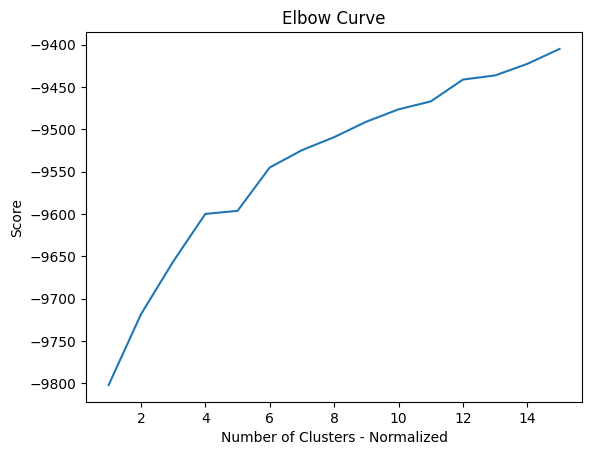

In [7]:
N = range(1, 16)
kmeans = []
for i in N:
    kmeans.append(KMeans(i))

score = []
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(vectorized_text).score(vectorized_text))

plt.plot(N,score)
plt.xlabel('Number of Clusters - Normalized')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Question 4:
How many clusters did you decide to use and why?

a. Five, because the optimal number of clusters is taken at the first sharp elbow, as this is where the trade-off between complexity and explained variation is balanced best.

b. 14, because it indicates a further meaningful segmentation before diminishing returns predominantly set in.

c. Ten, because this point yields diminishing returns in terms of reducing cluster variance. 

Set the value of `ans4` to 'a', 'b', 'c' or 'd' depending on your answer.

In [8]:
### GRADED CELL
ans4 = None

# YOUR CODE HERE
#raise NotImplementedError()

ans4 = 'a'

### Question 5:

Now create a k-means model for your chosen number of clusters. Assign it to `kmeans` and use the fit() method to your `vectorized_text`.

In [9]:
### GRADED CELL
number_of_clusters = 5
kmeans = None

# YOUR CODE HERE
#raise NotImplementedError()

kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
kmeans.fit(vectorized_text)


KMeans(n_clusters=5, random_state=42)

You will now make a word cloud of the most common words in each cluster. 

In [10]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


The two functions below will allow you to plot the word clouds easily.

In [11]:


# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

Use the code cell below to create word clouds for each cluster. What are the significant clusters you see?

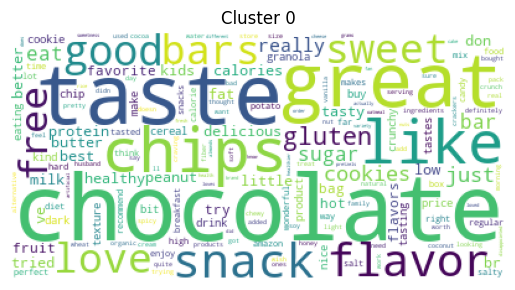

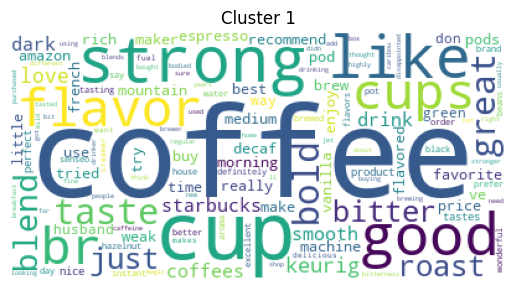

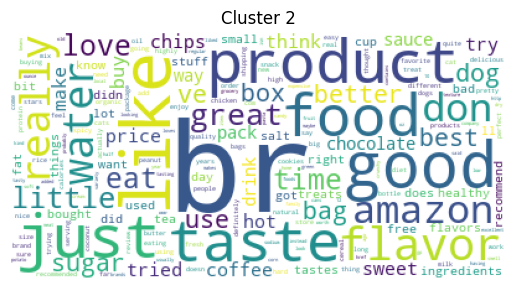

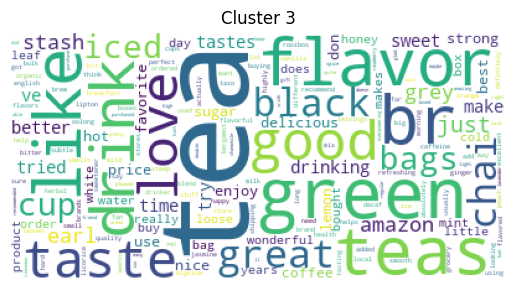

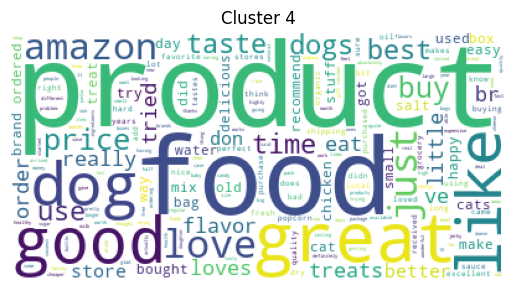

In [12]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

tf_idf = pd.DataFrame(data = vectorized_text.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

- Each cluster groups data points (such as text documents) that share similar content or characteristics.

- The word clouds visually highlight the most frequent and important words in each cluster, revealing the dominant themes or topics.

- By comparing the word clouds of different clusters, you can observe how clusters differ in vocabulary and focus, reflecting meaningful segmentations in the data.

- Clustering combined with word clouds is a powerful way to simplify complex data sets into easy-to-understand segments, facilitating interpretation and further analysis.

[Back to top](#Index:)

<a id='part2'></a>

### Part 2: hierarchical clustering

In this part of the assignment, you will be clustering Airbnb data from New York. This data set includes the following factors:

- `price` - price in dollars
- `minimum_nights` - the minimum number of nights a guest can stay
- `number_of_reviews` - the number of reviews the listing has
- `reviews_per_month` - the number of reviews it has got per month
- `calculated_host_listings_count` - the number of listings the host has
- `availability_365` - how many days a year it is available

### Question 6:

Load the `AB_NYC.csv` data set and  assign it to `data`. Use `.head(10)` to explore the first ten rows of data.

In [13]:
### GRADED CELL
data = None

# YOUR CODE HERE
#raise NotImplementedError()

data = pd.read_csv("data/AB_NYC.csv")

data.head(10)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,140,2,37,2.64,1,157
1,90,3,8,0.32,1,0
2,225,2,3,0.09,1,88
3,47,1,18,0.80,1,0
4,155,20,25,1.06,2,62
5,157,4,54,0.66,2,12
6,150,3,28,2.58,2,57
7,130,2,3,3.00,3,132
8,40,1,1,1.00,3,179
9,75,1,2,1.82,7,362


### Question 7:

- Use `normalize` to normalise the data. You'll need to pass the argument `axis=1` to the normalise function so it normalises each column separately.
- Assign it to the variable `data_scaled`.
- Create a dataframe from `data_scaled` using `pd.DataFrame()`, and assign the dataframe back to the same `data_scaled` variable.. Use `data.columns` for the columns argument.

In [15]:
### GRADED CELL
data_scaled = None
# YOUR CODE HERE

#raise NotImplementedError()
#print(data_scaled)

from sklearn.preprocessing import normalize

data_scaled = normalize(data, axis=1)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)


### Question 8:
Make a dendrogram from the data by plotting a figure from the matplotlib library and using the `dendrogram()`from the hierarchical module of the SciPy library, which you imported as `shc`. Use `method='ward'` and assign your result to `dend`. 

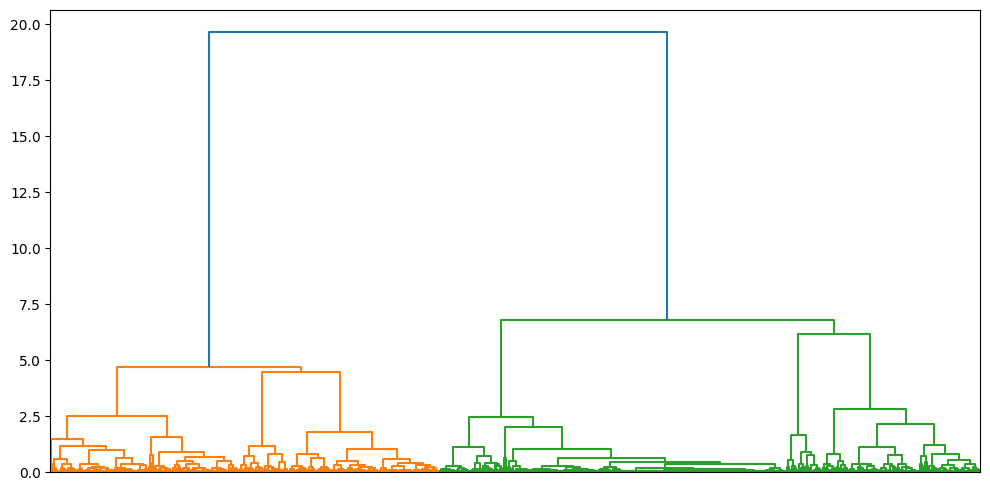

In [16]:
### GRADED CELL
dend=None

# YOUR CODE HERE
#raise NotImplementedError()

plt.figure(figsize=(12, 6))
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

### Question 9:
How many clusters would you choose?

a. Two

b. Four

c. Eight

Set the value of `ans9` to 'a', 'b' or 'c' depending on your answer.



In [17]:
### GRADED CELL
ans9 = None

# YOUR CODE HERE
#raise NotImplementedError()

ans9 = 'a'


Now, `AgglomerativeClustering` is used to create the selected number of clusters. 

In [18]:

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
_ = cluster.fit_predict(data_scaled)

Use the cell below to visualise the clusters.


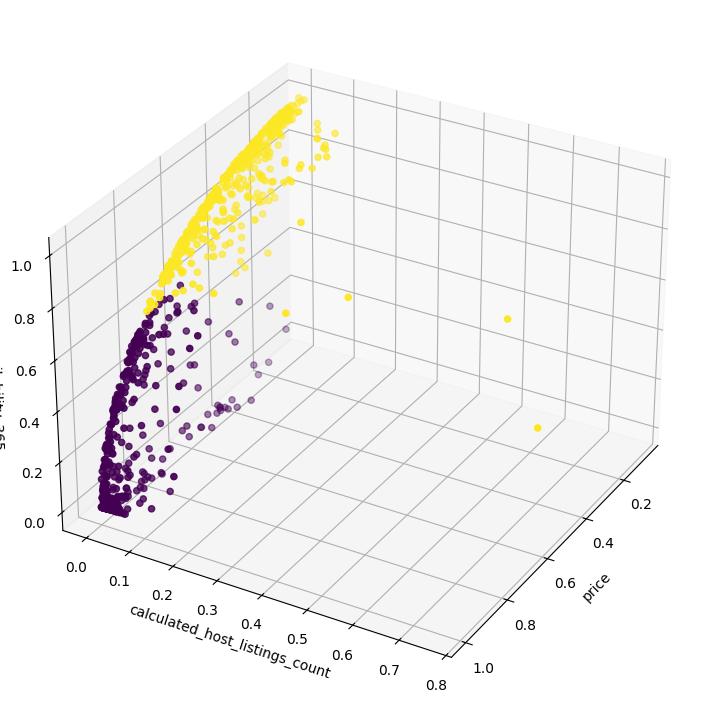

Text(0.5, 0, 'availability_365')

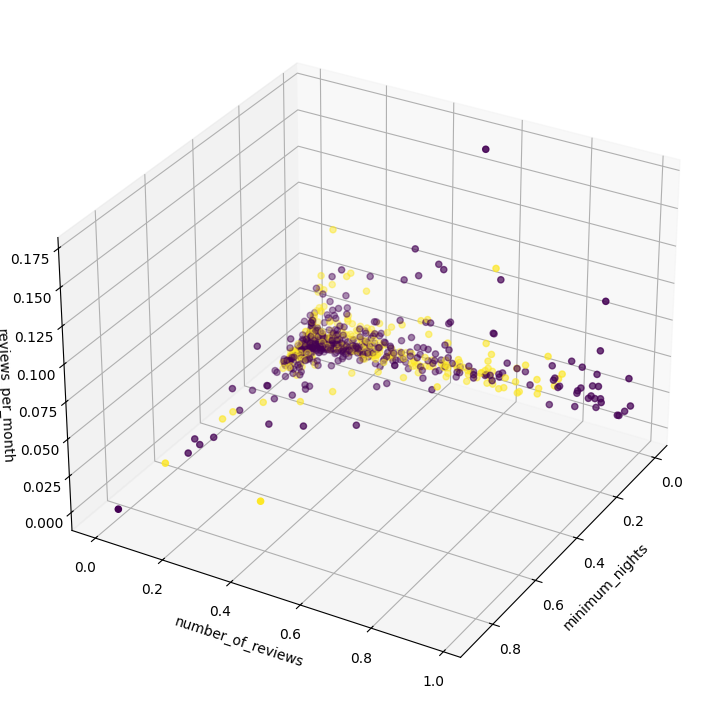

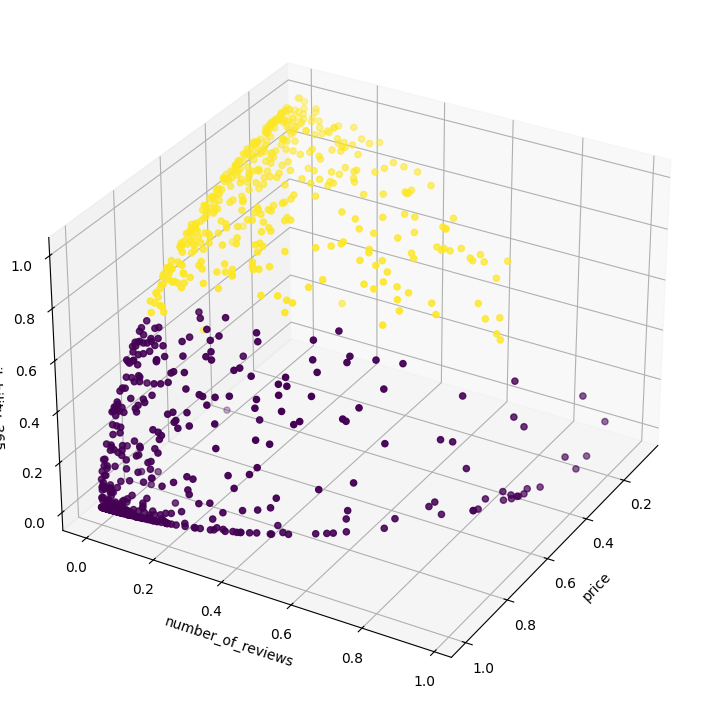

In [19]:


fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')
ax.scatter3D(data_scaled['price'],data_scaled['calculated_host_listings_count'
             ],data_scaled['availability_365'], c=cluster.labels_)
ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('calculated_host_listings_count')
ax.set_zlabel('availability_365')
plt.show()

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['minimum_nights'], data_scaled['number_of_reviews'
             ],data_scaled['reviews_per_month'], c=cluster.labels_)
ax.view_init(30,30)
ax.set_xlabel('minimum_nights')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('reviews_per_month')

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['price'], data_scaled['number_of_reviews'
             ],data_scaled['availability_365'], c=cluster.labels_)

ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('availability_365')

### Question 10:
Add a new column to your data dataframe called `cluster` for the cluster labels. Check the AgglomerativeClustering [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#agglomerativeclustering) if you need a reminder of which attribute stores the labels.
Then use the pandas `groupby()` function to calculate the mean of each cluster.

In [20]:
###GRADED CELL
data['cluster'] = None

# YOUR CODE HERE
#raise NotImplementedError()

# Add cluster labels to the original data
data['cluster'] = cluster.labels_

# Compute and display the mean of each feature per cluster
print(data.groupby('cluster').mean())

              price  minimum_nights  number_of_reviews  reviews_per_month  \
cluster                                                                     
0        164.714777        4.896907          22.209622           1.137955   
1        114.019139        8.564593          38.799043           1.784641   

         calculated_host_listings_count  availability_365  
cluster                                                    
0                              1.589347         30.460481  
1                              6.763158        247.622010  
